In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
target = 'Survived'
target_mean = titanic[target].mean()

In [11]:
# 숫자형 -> 범주형

In [5]:
feature = 'Age'

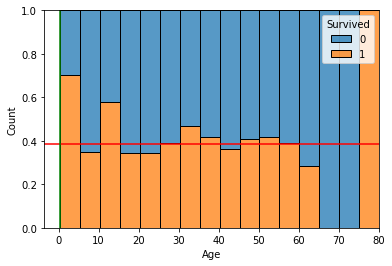

In [9]:
sns.histplot(x=feature, data = titanic, hue = target, multiple = 'fill',bins = 16)
plt.axhline(target_mean, color = 'r') # 수평선
plt.axvline(target_mean, color = 'g') # 수직선
plt.show()

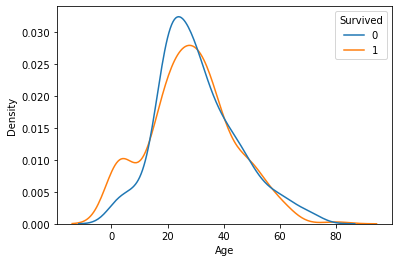

In [10]:
sns.kdeplot(x=feature, data = titanic, hue =target, common_norm=False)
plt.show()

In [12]:
temp = titanic.loc[titanic[feature].notnull()]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.672504
         Iterations 4
Age    9.909841e-08
dtype: float64


In [13]:
# 범주형 -> 범주형

In [14]:
feature = 'Sex'

In [15]:
pd.crosstab(titanic[target], titanic[feature], normalize='columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


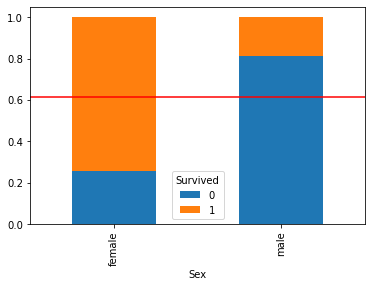

In [16]:
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

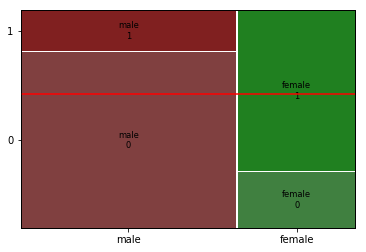

In [19]:
mosaic(titanic, [ feature, target])
plt.axhline(1-target_mean, color = 'r')
plt.show()

In [20]:
table = pd.crosstab(titanic[target], titanic[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 260.71702016732104
p-value 1.1973570627755645e-58
